In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv("C:\\Users\\User\\Downloads\\Company_Data.csv")

In [3]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


## EDA

In [4]:
data['SalesCategory'] = pd.cut(data['Sales'],bins=[0 , 5 , 10 , 15 , 20],labels=['Low Sales','Moderate Sales',
                                                                                 'High Sales','Very HighSales'])

In [5]:
data1 = pd.get_dummies(data , columns=['ShelveLoc','Urban','US','SalesCategory'],drop_first= True) 

In [6]:
data1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes,SalesCategory_Moderate Sales,SalesCategory_High Sales,SalesCategory_Very HighSales
0,9.50,138,73,11,276,120,42,17,0,0,1,1,1,0,0
1,11.22,111,48,16,260,83,65,10,1,0,1,1,0,1,0
2,10.06,113,35,10,269,80,59,12,0,1,1,1,0,1,0
3,7.40,117,100,4,466,97,55,14,0,1,1,1,1,0,0
4,4.15,141,64,3,340,128,38,13,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,0,1,1,0,1,0
396,6.14,139,23,3,37,120,55,11,0,1,0,1,1,0,0
397,7.41,162,26,12,368,159,40,18,0,1,1,1,1,0,0
398,5.94,100,79,7,284,95,50,12,0,0,1,1,1,0,0


In [7]:
X = data1.iloc[:,1:11]

In [8]:
X

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes
0,138,73,11,276,120,42,17,0,0,1
1,111,48,16,260,83,65,10,1,0,1
2,113,35,10,269,80,59,12,0,1,1
3,117,100,4,466,97,55,14,0,1,1
4,141,64,3,340,128,38,13,0,0,1
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,1,0,1
396,139,23,3,37,120,55,11,0,1,0
397,162,26,12,368,159,40,18,0,1,1
398,100,79,7,284,95,50,12,0,0,1


In [9]:
y = data1.iloc[:,12:15]

In [10]:
y

,SalesCategory_Moderate Sales,SalesCategory_High Sales,SalesCategory_Very HighSales
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,0,0
...,...,...,...
395,0,1,0
396,1,0,0
397,1,0,0
398,1,0,0


## Spiliting the data into Train And Test Sets

In [11]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.3 , random_state= 42)

## Building And fitting the decision tree model

In [12]:
model = DecisionTreeClassifier(criterion='entropy' , max_depth=3 )

In [13]:
model

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [14]:
model.fit(X_train , y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5, 0.875, 'x[7] <= 0.5\nentropy = 0.568\nsamples = 280\nvalue = [[112, 168]\n[227, 53]\n[279, 1]]'),
 Text(0.25, 0.625, 'x[4] <= 105.5\nentropy = 0.483\nsamples = 224\nvalue = [[81, 143]\n[199, 25]\n[224, 0]]'),
 Text(0.125, 0.375, 'x[5] <= 59.5\nentropy = 0.588\nsamples = 74\nvalue = [[25, 49]\n[54, 20]\n[74, 0]]'),
 Text(0.0625, 0.125, 'entropy = 0.661\nsamples = 40\nvalue = [[19, 21]\n[23, 17]\n[40, 0]]'),
 Text(0.1875, 0.125, 'entropy = 0.368\nsamples = 34\nvalue = [[6, 28]\n[31, 3]\n[34, 0]]'),
 Text(0.375, 0.375, 'x[0] <= 123.5\nentropy = 0.388\nsamples = 150\nvalue = [[56, 94]\n[145, 5]\n[150, 0]]'),
 Text(0.3125, 0.125, 'entropy = 0.332\nsamples = 49\nvalue = [[26, 23]\n[49, 0]\n[49, 0]]'),
 Text(0.4375, 0.125, 'entropy = 0.387\nsamples = 101\nvalue = [[30, 71]\n[96, 5]\n[101, 0]]'),
 Text(0.75, 0.625, 'x[4] <= 119.5\nentropy = 0.707\nsamples = 56\nvalue = [[31, 25]\n[28, 28]\n[55, 1]]'),
 Text(0.625, 0.375, 'x[2] <= 7.5\nentropy = 0.56\nsamples = 23\nvalue = [[19, 4]\n

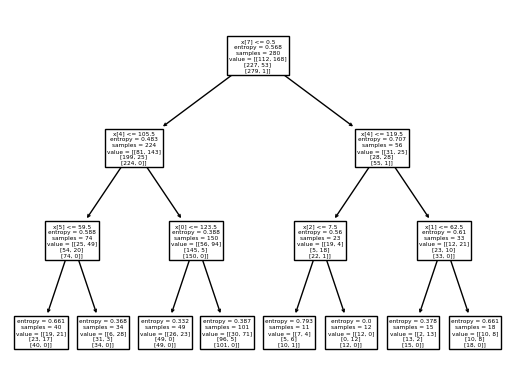

In [15]:
tree.plot_tree(model)

[Text(0.5, 0.875, 'ShelveLoc_Good <= 0.5\nentropy = 0.568\nsamples = 280\nvalue = [[112, 168]\n[227, 53]\n[279, 1]]'),
 Text(0.25, 0.625, 'Price <= 105.5\nentropy = 0.483\nsamples = 224\nvalue = [[81, 143]\n[199, 25]\n[224, 0]]'),
 Text(0.125, 0.375, 'Age <= 59.5\nentropy = 0.588\nsamples = 74\nvalue = [[25, 49]\n[54, 20]\n[74, 0]]'),
 Text(0.0625, 0.125, 'entropy = 0.661\nsamples = 40\nvalue = [[19, 21]\n[23, 17]\n[40, 0]]'),
 Text(0.1875, 0.125, 'entropy = 0.368\nsamples = 34\nvalue = [[6, 28]\n[31, 3]\n[34, 0]]'),
 Text(0.375, 0.375, 'CompPrice <= 123.5\nentropy = 0.388\nsamples = 150\nvalue = [[56, 94]\n[145, 5]\n[150, 0]]'),
 Text(0.3125, 0.125, 'entropy = 0.332\nsamples = 49\nvalue = [[26, 23]\n[49, 0]\n[49, 0]]'),
 Text(0.4375, 0.125, 'entropy = 0.387\nsamples = 101\nvalue = [[30, 71]\n[96, 5]\n[101, 0]]'),
 Text(0.75, 0.625, 'Price <= 119.5\nentropy = 0.707\nsamples = 56\nvalue = [[31, 25]\n[28, 28]\n[55, 1]]'),
 Text(0.625, 0.375, 'Advertising <= 7.5\nentropy = 0.56\nsamples =

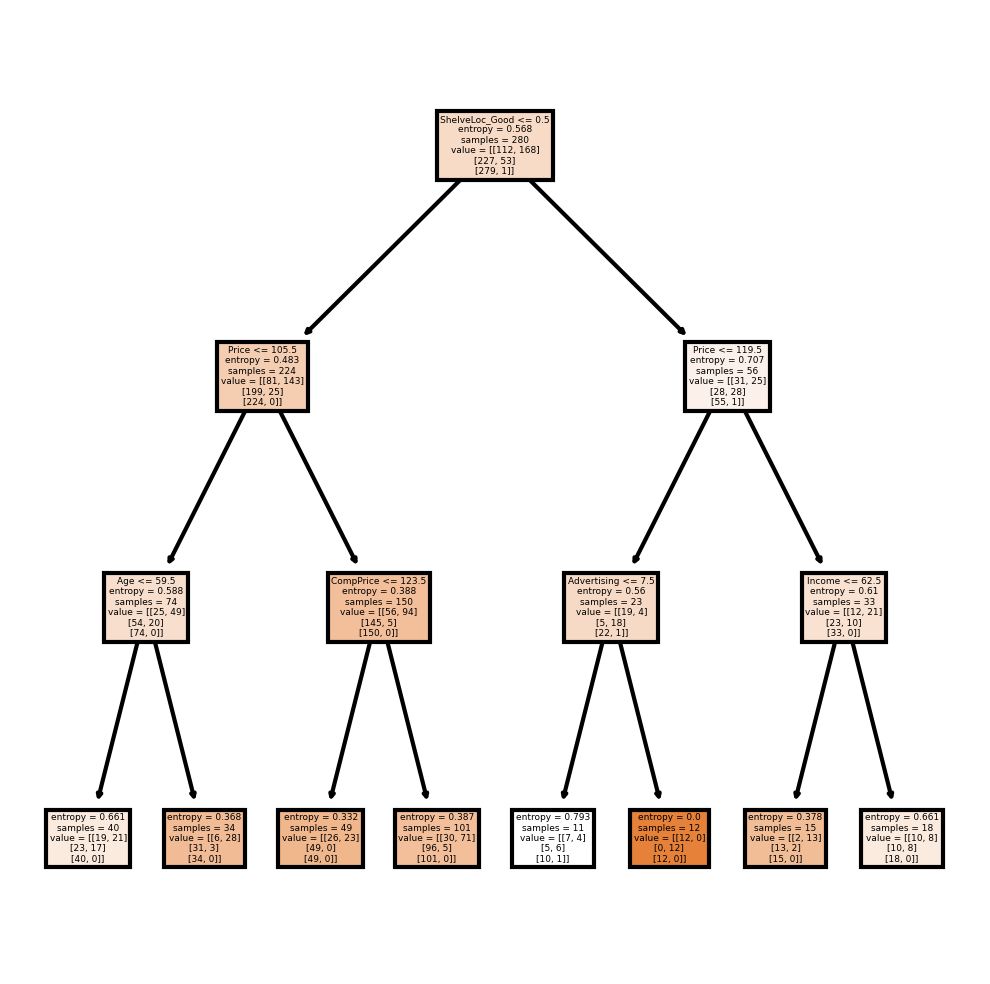

In [16]:
fn = ['CompPrice','Income','Advertising','Population','Price','Age','Education',
      'ShelveLoc_Good','ShelveLoc_Medium','Urban_Yes']
cn = ['SalesCategory_Moderate Sales','SalesCategory_High Sales','SalesCategory_Very HighSales']
fig,axes = plt.subplots(nrows = 1 ,ncols = 1 ,figsize = (4,4) , dpi= 300)
tree.plot_tree(model, feature_names=fn , class_names= cn, filled = True)

In [17]:
pred = model.predict(X_test)

In [18]:
pred

array([[1, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1,

In [19]:
print(classification_report(y_test,pred))
print("Accuracy:", accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76        77
           1       0.69      0.48      0.56        23
           2       0.00      0.00      0.00         1

   micro avg       0.76      0.68      0.72       101
   macro avg       0.49      0.41      0.44       101
weighted avg       0.75      0.68      0.71       101
 samples avg       0.57      0.57      0.57       101

Accuracy: 0.65


C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Building Decision Tree Classifier (CART) using Gini Criteria¶

In [20]:
model_gini = DecisionTreeClassifier(criterion='gini',max_depth=3)

In [21]:
model_gini.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'ShelveLoc_Good <= 0.5\ngini = 0.265\nsamples = 280\nvalue = [[112, 168]\n[227, 53]\n[279, 1]]'),
 Text(0.25, 0.625, 'Price <= 94.5\ngini = 0.22\nsamples = 224\nvalue = [[81, 143]\n[199, 25]\n[224, 0]]'),
 Text(0.125, 0.375, 'CompPrice <= 120.5\ngini = 0.319\nsamples = 35\nvalue = [[15, 20]\n[22, 13]\n[35, 0]]'),
 Text(0.0625, 0.125, 'gini = 0.254\nsamples = 27\nvalue = [[8, 19]\n[21, 6]\n[27, 0]]'),
 Text(0.1875, 0.125, 'gini = 0.146\nsamples = 8\nvalue = [[7, 1]\n[1, 7]\n[8, 0]]'),
 Text(0.375, 0.375, 'Price <= 125.5\ngini = 0.191\nsamples = 189\nvalue = [[66, 123]\n[177, 12]\n[189, 0]]'),
 Text(0.3125, 0.125, 'gini = 0.189\nsamples = 113\nvalue = [[30, 83]\n[102, 11]\n[113, 0]]'),
 Text(0.4375, 0.125, 'gini = 0.175\nsamples = 76\nvalue = [[36, 40]\n[75, 1]\n[76, 0]]'),
 Text(0.75, 0.625, 'Price <= 119.5\ngini = 0.343\nsamples = 56\nvalue = [[31, 25]\n[28, 28]\n[55, 1]]'),
 Text(0.625, 0.375, 'Advertising <= 7.5\ngini = 0.237\nsamples = 23\nvalue = [[19, 4]\n[5, 18]

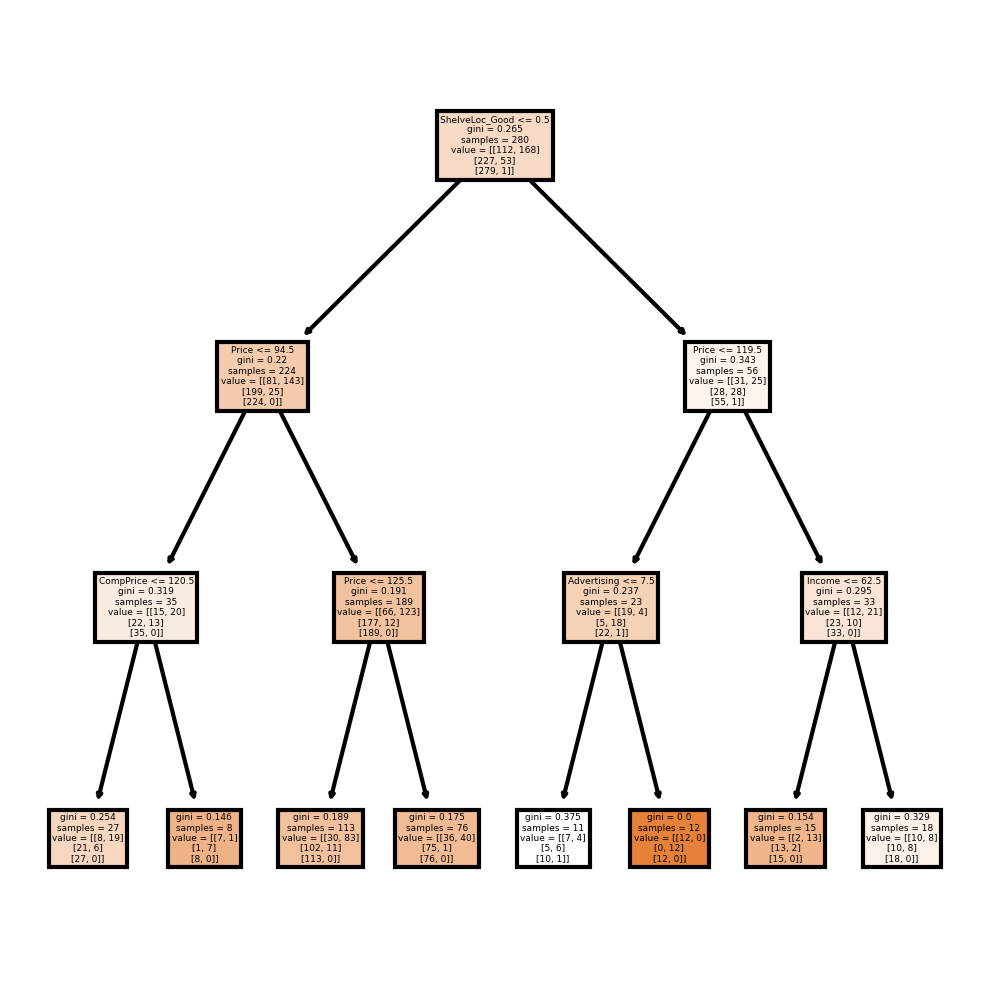

In [22]:
fn = ['CompPrice','Income','Advertising','Population','Price','Age','Education',
      'ShelveLoc_Good','ShelveLoc_Medium','Urban_Yes']
cn = ['SalesCategory_Moderate Sales','SalesCategory_High Sales','SalesCategory_Very HighSales']
fig ,axes = plt.subplots(nrows = 1 ,ncols = 1 ,figsize =(4,4), dpi = 300)
tree.plot_tree(model_gini , feature_names=fn , class_names=cn ,filled=True)

In [23]:
pred=model_gini.predict(X_test)

In [24]:
pred

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1,

In [25]:
print(classification_report(y_test,pred))
print("accuracy :",accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77        77
           1       0.58      0.61      0.60        23
           2       0.00      0.00      0.00         1

   micro avg       0.70      0.75      0.72       101
   macro avg       0.44      0.47      0.45       101
weighted avg       0.69      0.75      0.72       101
 samples avg       0.63      0.63      0.63       101

accuracy : 0.6333333333333333


C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Decision Tree Regression 

In [26]:
from sklearn.tree import DecisionTreeRegressor

In [27]:
data1 

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes,SalesCategory_Moderate Sales,SalesCategory_High Sales,SalesCategory_Very HighSales
0,9.50,138,73,11,276,120,42,17,0,0,1,1,1,0,0
1,11.22,111,48,16,260,83,65,10,1,0,1,1,0,1,0
2,10.06,113,35,10,269,80,59,12,0,1,1,1,0,1,0
3,7.40,117,100,4,466,97,55,14,0,1,1,1,1,0,0
4,4.15,141,64,3,340,128,38,13,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,0,1,1,0,1,0
396,6.14,139,23,3,37,120,55,11,0,1,0,1,1,0,0
397,7.41,162,26,12,368,159,40,18,0,1,1,1,1,0,0
398,5.94,100,79,7,284,95,50,12,0,0,1,1,1,0,0


In [48]:
x_train,x_test ,y_train , y_test = train_test_split(x,y,test_size=0.33 , random_state=3)

In [49]:
array = np.array(data1)
x = array[:,1:11]
y = array[:,12:15]

In [50]:
x

array([[138.,  73.,  11., ...,   0.,   0.,   1.],
       [111.,  48.,  16., ...,   1.,   0.,   1.],
       [113.,  35.,  10., ...,   0.,   1.,   1.],
       ...,
       [162.,  26.,  12., ...,   0.,   1.,   1.],
       [100.,  79.,   7., ...,   0.,   0.,   1.],
       [134.,  37.,   0., ...,   1.,   0.,   1.]])

In [51]:
y

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [52]:
model = DecisionTreeRegressor()

In [53]:
model.fit(x_train ,y_train)

DecisionTreeRegressor()

In [60]:
pred_dtr = model.predict(x_test)

In [61]:
print(classification_report(y_test,pred_dtr))
print("accuracy : ",accuracy_score(y_test,pred_dtr))

              precision    recall  f1-score   support

           0       0.66      0.71      0.68        79
           1       0.48      0.43      0.45        28
           2       0.00      0.00      0.00         1

   micro avg       0.62      0.63      0.62       108
   macro avg       0.38      0.38      0.38       108
weighted avg       0.61      0.63      0.62       108
 samples avg       0.52      0.52      0.52       108

accuracy :  0.5909090909090909


C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [64]:
print('Mean Squared Error:', mean_squared_error(y_test, pred_dtr))
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_dtr))
print('R-squared Score:', r2_score(y_test, pred_dtr))

Mean Squared Error: 0.20707070707070707
Mean Absolute Error: 0.20707070707070707
R-squared Score: -0.3205179836398882
